In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [33]:
from sklearn.metrics import confusion_matrix, f1_score

In [64]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [65]:
df = pd.read_csv('./penguins.csv')

In [66]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [67]:
features = df.drop(columns=['species', 'sex', 'island'])
labels   = df['species']

In [68]:
dummies = pd.get_dummies(df['island'], prefix='Island')
for c in dummies.columns.values:
    features[c] = dummies[c]
    
features = features.fillna(features.mean())

In [101]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, stratify=labels, test_size=0.3, random_state=2023)

In [70]:
x_train

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Island_Biscoe,Island_Dream,Island_Torgersen
13,38.6,21.2,191.0,3800.0,False,False,True
232,45.5,13.7,214.0,4650.0,True,False,False
223,50.0,15.2,218.0,5700.0,True,False,False
83,35.1,19.4,193.0,4200.0,False,False,True
281,46.2,14.9,221.0,5300.0,True,False,False
...,...,...,...,...,...,...,...
337,48.8,16.2,222.0,6000.0,True,False,False
166,45.9,17.1,190.0,3575.0,False,True,False
115,42.7,18.3,196.0,4075.0,True,False,False
141,40.6,17.2,187.0,3475.0,False,True,False


In [71]:
x_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Island_Biscoe,Island_Dream,Island_Torgersen
246,44.5,14.3,216.0,4100.0,True,False,False
287,49.5,16.2,229.0,5800.0,True,False,False
18,34.4,18.4,184.0,3325.0,False,False,True
248,48.2,14.3,210.0,4600.0,True,False,False
55,41.4,18.6,191.0,3700.0,True,False,False
...,...,...,...,...,...,...,...
159,51.3,18.2,197.0,3750.0,False,True,False
191,53.5,19.9,205.0,4500.0,False,True,False
312,45.5,14.5,212.0,4750.0,True,False,False
150,36.0,17.1,187.0,3700.0,False,True,False


In [72]:
rf = RandomForestClassifier(n_estimators=20)

In [73]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [74]:
y_pred = rf.predict(x_test)

In [75]:
confusion_matrix(y_test, y_pred)

array([[46,  0,  0],
       [ 5, 16,  0],
       [ 0,  0, 37]])

In [76]:
f1_score(y_test, y_pred, average=None)

array([0.94845361, 0.86486486, 1.        ])

In [77]:
fimp = pd.DataFrame(dict(fimp=rf.feature_importances_, index=features.columns))

In [86]:
cdict = {}
for i, c in enumerate(features.columns):
    cdict[c] = 'C'+str(i)

In [87]:
cdict

{'bill_length_mm': 'C0',
 'bill_depth_mm': 'C1',
 'flipper_length_mm': 'C2',
 'body_mass_g': 'C3',
 'Island_Biscoe': 'C4',
 'Island_Dream': 'C5',
 'Island_Torgersen': 'C6'}

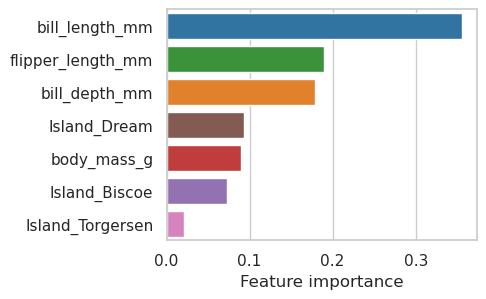

In [88]:
fig=plt.figure(figsize=(4, 3))
sns.barplot(data=fimp.sort_values('fimp', ascending=False), x='fimp', y='index', palette=cdict)
ax=plt.gca()
ax.set_xlabel('Feature importance')
ax.set_ylabel('')
plt.show()

# Leave one out

In [98]:
all_features = df.drop(columns=['species', 'sex']).columns.values
all_features

array(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'], dtype=object)

In [108]:
for i, left_out in enumerate(all_features):
    
    features = df.drop(columns=['species', 'sex', 'island'])
    labels   = df['species']
    
    print(left_out)
    
    if not left_out == 'island':
        dummies = pd.get_dummies(df['island'], prefix='Island')
        for c in dummies.columns.values:
            features[c] = dummies[c]
    
    features = features.fillna(features.mean())
        
    # split
    x_train, x_test, y_train, y_test = train_test_split(features, labels, 
                                                        stratify=labels, test_size=0.3, 
                                                        random_state=2023)
    rf = RandomForestClassifier(n_estimators=5)
    rf.fit(x_train, y_train)
    
    score = rf.score(x_test, y_test)
    confmat = confusion_matrix(y_test, rf.predict(x_test))
    print(confmat)
    print(score)
    print(f1_score(y_test, rf.predict(x_test), average=None))
    print()

island
[[44  1  1]
 [ 1 20  0]
 [ 1  0 36]]
0.9615384615384616
[0.95652174 0.95238095 0.97297297]

bill_length_mm
[[45  0  1]
 [ 1 20  0]
 [ 0  0 37]]
0.9807692307692307
[0.97826087 0.97560976 0.98666667]

bill_depth_mm
[[46  0  0]
 [ 2 19  0]
 [ 0  0 37]]
0.9807692307692307
[0.9787234 0.95      1.       ]

flipper_length_mm
[[46  0  0]
 [ 0 21  0]
 [ 0  0 37]]
1.0
[1. 1. 1.]

body_mass_g
[[46  0  0]
 [ 3 18  0]
 [ 0  0 37]]
0.9711538461538461
[0.96842105 0.92307692 1.        ]

